In [ ]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
!curl -L "https://app.roboflow.com/ds/TsY8JUn92v?key=mEG5BhA5Tl" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip
%cd /content/
%mkdir images/
%mv train images/train
%mv test images/test
%mv valid images/valid

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   892  100   892    0     0    467      0  0:00:01  0:00:01 --:--:--   466
100 7587k  100 7587k    0     0  3417k      0  0:00:02  0:00:02 --:--:-- 3417k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_tokenization.txt  
   creating: test/complete/
 extracting: test/complete/2022-03-11-11-3A26-3A00-815424_jpg.rf.4a0085a397e96444b03d5517f11a2080.jpg  
 extracting: test/complete/2022-03-11-11-3A26-3A10-808654_jpg.rf.f5a2dbc240cede0ac2713b3e1600a83f.jpg  
 extracting: test/complete/2022-03-11-11-3A26-3A12-297631_jpg.rf.96833d9cc89efe554a4f0d2ed02650a4.jpg  
 extracting: test/complete/2022-10-06-07_52_45-421069_jpg.rf.02c5372bc1cf91a923a11ae5cd3af4d0.jpg  
 extracting: test/complete/2022-10-06-07_52_45-685797_jpg.rf.e338389ee61f7d1f8fdf407bb2e

In [ ]:
import tensorflow_datasets as tfds
builder = tfds.folder_dataset.ImageFolder('images/')
print(builder.info)
raw_train = builder.as_dataset(split='train', shuffle_files=True)
raw_test = builder.as_dataset(split='test', shuffle_files=True)
raw_valid = builder.as_dataset(split='valid', shuffle_files=True)

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='images/',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=18, num_shards=1>,
        'train': <SplitInfo num_examples=120, num_shards=1>,
        'valid': <SplitInfo num_examples=34, num_shards=1>,
    },
    citation="""""",
)


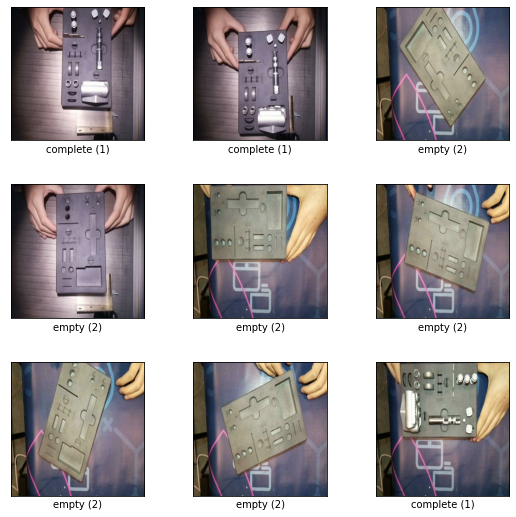

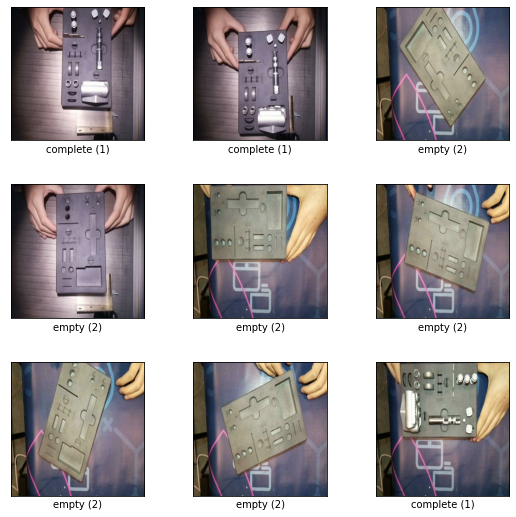

In [ ]:
tfds.show_examples(raw_train, builder.info)

In [ ]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(pair):
  image, label = pair['image'], pair['label']
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [ ]:
train = raw_train.map(format_example)
validation = raw_valid.map(format_example)
test = raw_test.map(format_example)

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [ ]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape

TensorShape([32, 160, 160, 3])

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

ModuleNotFoundError: ignored